Assignment 5 (CGS698C)

Part 1

In [1]:
# required libraries for complete assignment
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from scipy.stats import binom, beta, norm, uniform

In [2]:
# Given data and priors
data = np.array([10, 15, 15, 14, 14, 14, 13, 11, 12, 16])
n = 20
N = len(data)
sum_y = np.sum(data)

In [3]:
# Model 1: Beta(6, 6) prior
alpha1_prior = 6
beta1_prior = 6
alpha1_post = alpha1_prior + sum_y
beta1_post = beta1_prior + (N * n - sum_y)

# Model 2: Beta(20, 60) prior
alpha2_prior = 20
beta2_prior = 60
alpha2_post = alpha2_prior + sum_y
beta2_post = beta2_prior + N * n - sum_y

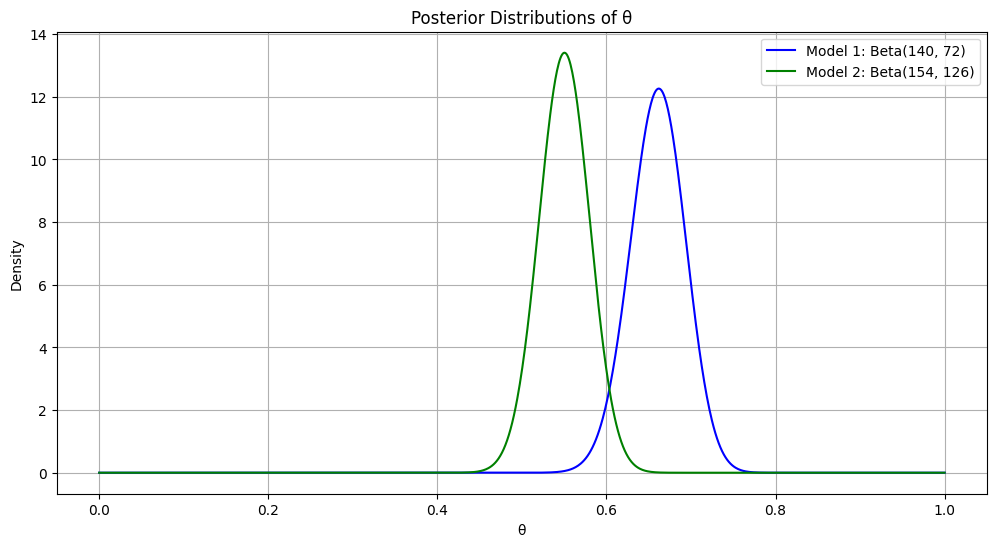

In [4]:
# Q1
# Define theta range for plotting
theta = np.linspace(0, 1, 1000)

# Posterior distributions
posterior1 = beta.pdf(theta, alpha1_post, beta1_post)
posterior2 = beta.pdf(theta, alpha2_post, beta2_post)

# Plotting the posteriors
plt.figure(figsize=(12, 6))
plt.plot(theta, posterior1, label='Model 1: Beta(140, 72)', color='blue')
plt.plot(theta, posterior2, label='Model 2: Beta(154, 126)', color='green')
plt.title('Posterior Distributions of θ')
plt.xlabel('θ')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Q2
k = 5  # Number of folds

# Create k folds of test and training data
indices = np.arange(N)
random.shuffle(indices)
folds = np.array_split(indices, k)

# Function to calculate lppd for a given model
def calculate_lppd(alpha_prior, beta_prior):
    lppd = np.zeros(k)
    
    for i in range(k):
        test_indices = folds[i]
        train_indices = np.setdiff1d(indices, test_indices)
        
        # train and tessting data
        ytrain = data[train_indices]
        ytest = data[test_indices]
        
        # posterior parameters calcs below
        alpha_post = alpha_prior + ytrain.sum()
        beta_post = beta_prior + len(ytrain) * 20 - ytrain.sum()
        # Sample from posterior distribution
        sample_theta = np.random.beta(alpha_post, beta_post, 1000)
        
        lppd_i = 0  # initialization
        # calculating lpd for each data poimt
        for y in ytest:
            lpd_ij = np.log(np.mean(binom.pmf(y, 20, sample_theta)))
            lppd_i += lpd_ij # Sum up log predictive densities
        
        lppd[i] = lppd_i # Storing lppd for the current fold
    
    return lppd

# Model 1: Beta(6, 6) prior
alpha1_prior = 6
beta1_prior = 6
ml = 4.18*(1e-3)
lppd_m1 = calculate_lppd(alpha1_prior, beta1_prior)
# Sum lppd for expected log pointwise predictive density for Model 1
elpd_m1 = lppd_m1.sum()

# Model 2: Beta(20, 60) prior
alpha2_prior = 20
beta2_prior = 60
lppd_m2 = calculate_lppd(alpha2_prior, beta2_prior)
# Sum lppd for expected log pointwise predictive density for Model 2
elpd_m2 = lppd_m2.sum()

print(f"Model 1 ELPD: {elpd_m1:.4f}")
print(f"Model 2 ELPD: {elpd_m2:.4f}")

Model 1 ELPD: -21.3014
Model 2 ELPD: -28.3015


In [6]:
# Q3
#in-sample deviance for each model from the given formula
in_sample_deviance_m1 = -2 * elpd_m1
in_sample_deviance_m2 = -2 * elpd_m2


# results
print(f"Model 1 In-sample Deviance: {in_sample_deviance_m1:.4f}")
print(f"Model 2 In-sample Deviance: {in_sample_deviance_m2:.4f}")
# reasoning
print("\n\nIn-sample deviance measures how well the model fits the training data. The term \'in-sample\' refers to the data used to fit the model \n(in this case, the training data). The deviance is a measure of goodness-of-fit, where lower values indicate a better fit. By calculating the in-sample deviance, \nwe assess the model's performance on the data it was trained on, which provides insight into how well the model captures the underlying patterns in the data. \nThis measure is crucial because a good fit to the training data is a prerequisite for making reliable predictions on new, unseen data.")


Model 1 In-sample Deviance: 42.6029
Model 2 In-sample Deviance: 56.6030


In-sample deviance measures how well the model fits the training data. The term 'in-sample' refers to the data used to fit the model 
(in this case, the training data). The deviance is a measure of goodness-of-fit, where lower values indicate a better fit. By calculating the in-sample deviance, 
we assess the model's performance on the data it was trained on, which provides insight into how well the model captures the underlying patterns in the data. 
This measure is crucial because a good fit to the training data is a prerequisite for making reliable predictions on new, unseen data.


In [7]:
# Q4
# explained as a print statemnt 
print("The model with the lower in-sample deviance is considered a better fit to the data because it indicates a better match between the model and the observed data. \nSo better model is MODEL 1")

The model with the lower in-sample deviance is considered a better fit to the data because it indicates a better match between the model and the observed data. 
So better model is MODEL 1


In [8]:
# Q5
# new data points
new_data = np.array([5,6,10,8,9])
N_new = len(new_data)

# helper func for lppd
def calculate_lppd(data, samples,n):
    lppd = 0
    for y in new_data:
        # for each data point    
        lpd = np.log(np.mean(binom.pmf(y, n, samples)))
        lppd += lpd # as above done again accumulating all lpds
    return lppd

# here theta_samples are from posterior beta dist
theta_samples1 = np.random.beta(alpha1_post, beta1_post, size=1000)
theta_samples2 = np.random.beta(alpha2_post, beta2_post, size=1000)

# lpd calcs 
lpd1_new = calculate_lppd(new_data, theta_samples1, n)
lpd2_new = calculate_lppd(new_data, theta_samples2, n)

# Compute lppd by summing lpds
lppd1_sum = np.sum(lpd1_new)
lppd2_sum = np.sum(lpd2_new)
# Compute out-of-sample deviance
out_sample_deviance1 = -2 * lppd1_sum
out_sample_deviance2 = -2 * lppd2_sum

print(f"Model 1 lppd: {lppd1_sum:.4f}")
print(f"Model 1 out-of-sample deviance: {out_sample_deviance1:.4f}")
print(f"Model 2 lppd: {lppd2_sum:.4f}")
print(f"Model 1 out-of-sample deviance: {out_sample_deviance2:.4f}")


Model 1 lppd: -25.1864
Model 1 out-of-sample deviance: 50.3727
Model 2 lppd: -15.8052
Model 1 out-of-sample deviance: 31.6105


In [9]:
# Q6
# Leave-one-out cross validation (LOO-CV)
# helper function
def loo_cv(alpha_prior, beta_prior):
    elpd = 0
    
    for i in range(N):
        # for each data point
        ytrain = np.delete(data, i) # remove the test point from train and
        ytest = data[i]             # as ytest
        
        # keep updating posterior parameters
        alpha_post = alpha_prior + ytrain.sum()
        beta_post = beta_prior + (N - 1) * 20 - ytrain.sum()
        # generate samples from posterior beta dist
        sample_theta = np.random.beta(alpha_post, beta_post, 1000)
        
        lpd_i = np.log(np.mean(binom.pmf(ytest, 20, sample_theta)))
        elpd += lpd_i # as done above accumulate all values
    
    return elpd

# for each model get elpd
elpd_m1 = loo_cv(alpha1_prior,beta1_prior)
elpd_m2 = loo_cv(alpha2_prior,beta2_prior)

print(f"Model M1 LOO-CV: {elpd_m1:.4f}")
print(f"Model M1 LOO-CV: {elpd_m2:.4f}")
print("The model with the higher LOO-CV is considered a better fit to the data as less deviance means better predictive accuracy. \nSo better model is MODEL 1")

Model M1 LOO-CV: -21.1749
Model M1 LOO-CV: -27.2159
The model with the higher LOO-CV is considered a better fit to the data as less deviance means better predictive accuracy. 
So better model is MODEL 1


Part 2

In [10]:
# Function to calculate the marginal likelihood
def ML_binomial(k, n, a, b):
    # Calculate the Binomial marginal likelihood using the formula
    ML = (math.factorial(n) / (math.factorial(k) * math.factorial(n - k))) * (
            math.factorial(k + a - 1) * math.factorial(n - k + b - 1) / math.factorial(n + a + b - 1)
    )
    return ML

# Parameters for the binomial model
k = 2 # number of success
n = 10 # total number of trials
a_ = 0.1
b_ = 0.4

# Define the list of Beta priors to use
priors = {
    "Beta_1_1": (1, 1),
    "Beta_2_6": (2, 6),
    "Beta_6_2": (6, 2),
    "Beta_20_60": (20, 60),
    "Beta_60_20": (60, 20)
}

# Compute and print the marginal likelihood for each Beta prior
print(f"Marginal Likelihood for (Beta({a_}, {b_})): {ml:.2e}")
for name,(a, b) in priors.items():
    # for each pair of beta parameters get ML
    marginal_likelihood = ML_binomial(k, n, a, b)
    print(f"Marginal Likelihood for (Beta({a}, {b})): {marginal_likelihood:.2e}")

Marginal Likelihood for (Beta(0.1, 0.4)): 4.18e-03
Marginal Likelihood for (Beta(1, 1)): 9.09e-02
Marginal Likelihood for (Beta(2, 6)): 4.73e-03
Marginal Likelihood for (Beta(6, 2)): 2.31e-04
Marginal Likelihood for (Beta(20, 60)): 5.08e-21
Marginal Likelihood for (Beta(60, 20)): 1.51e-23


In [11]:
# Define the list of Beta priors to use
priors = {
    "Beta_0.1_0.4": (0.1, 0.4),
    "Beta_1_1": (1, 1),
    "Beta_2_6": (2, 6),
    "Beta_6_2": (6, 2),
    "Beta_20_60": (20, 60),
    "Beta_60_20": (60, 20)
}

# Function to estimate the marginal likelihood using Monte Carlo Integration
def estimate_marginal_likelihood(a, b, k, n):
    theta_p = np.zeros(10000)  # Initialization of Markov chain
    theta_p[0] = 0.4  # Starting value for theta_p
    ML = 0
    i = 1
    
    while i < 10000:
        # Propose a new value for theta
        sample_theta = np.random.normal(theta_p[i - 1], 0.08)
        
        # Check if the proposed value is within the valid range
        if 0 < sample_theta < 1:
            # Compute the posterior probabilities
            post_new = binom.pmf(k, n, sample_theta) * beta.pdf(sample_theta, a, b)
            post_prev = binom.pmf(k, n, theta_p[i - 1]) * beta.pdf(theta_p[i - 1], a, b)
            
            # Compute the proposal density ratio
            proposal_density =( (post_new * norm.pdf(theta_p[i - 1], sample_theta, 0.08))) / (post_prev * norm.pdf(sample_theta, theta_p[i - 1], 0.08))
            
            # Acceptance criterion
            p_str = min(proposal_density, 1)
            if p_str > np.random.uniform(0, 1):
                theta_p[i] = sample_theta  # Accept the new value
                lkl = (binom.pmf(k, n, sample_theta) * beta.pdf(sample_theta, a, b)) / norm.pdf(sample_theta, theta_p[i - 1], 0.08)
                ML += lkl  # Update the maximum likelihood estimator
                i += 1  # Move to the next iteration
    
    # Compute the average likelihood
    return ML / 10000

# Compute the marginal likelihood for each Beta prior and print the results
results = {}
for name, (a, b) in priors.items():
    marginal_likelihood = estimate_marginal_likelihood(a, b, k, n)
    results[name] = marginal_likelihood
    print(f"Marginal Likelihood for (Beta({a}, {b})): {marginal_likelihood:.2e}")


Marginal Likelihood for (Beta(0.1, 0.4)): 4.29e-02
Marginal Likelihood for (Beta(1, 1)): 9.23e-02
Marginal Likelihood for (Beta(2, 6)): 2.20e-01
Marginal Likelihood for (Beta(6, 2)): 1.08e-02
Marginal Likelihood for (Beta(20, 60)): 4.08e-01
Marginal Likelihood for (Beta(60, 20)): 1.17e-03
